In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# define the system of equations
def F(r):
    x, y = r[0], r[1]
    return np.array([x**2 - y - x, 3*y**2 - x*y - y])

In [24]:
# define the Jacobian
def J(r):
    x, y = r[0], r[1]
    return np.array([[2*x - 1, -1], [-y, 6*y - x - 1]])

In [25]:
x_list = np.linspace(-2, 2, 21)
y_list = np.linspace(-2, 2, 21)

In [26]:
# multidimensional newton function
def multidimensional_newton(x0, y0):
    tol = 1e-5
    r = np.array([x0, y0]) # initial guess x0, y0
    i = 0
    while np.max(np.abs(F(r))) > tol: # iterate until one of f(x) or g(x) is over the threshold
        # implement multidimensional Newton's method here
        try:
            dr = np.linalg.solve(J(r), F(r)) # using multidimensional Netwon's method
            r = r - dr
        except np.linalg.LinAlgError:
            # the Jacobian is singular, saddle point, cannot continue with this point
            print(f"Jacobian is singular at point {x0}, {y0}")
            return None
        
        i += 1
        if i == 20:
            # indicate that the algorithm did not converge after 20 iterations
            print(f"Did not converge after 20 iterations at point {x0}, {y0}")
            return None
    return r


In [ ]:
roots = np.zeros((21, 21))
for i in range(21):
    for j in range(21):
        root = multidimensional_newton(x_list[i], y_list[j])
        if root is None: 
            roots[i, j] = -1  # did not converge
        elif np.allclose(root, np.array([0, 0]), atol=1e-3):
            roots[i, j] = 0
        elif np.allclose(root, np.array([1, 0]), atol=1e-3): 
            roots[i, j] = 1
        elif np.allclose(root, np.array([(2-np.sqrt(7))/3, (5-np.sqrt(7))/9]), atol=1e-3): # found real roots algebraically
            roots[i, j] = 2
        elif np.allclose(root, np.array([(2+np.sqrt(7))/3, (5+np.sqrt(7))/9]), atol=1e-3): 
            roots[i, j] = 3
        else:
            roots[i, j] = -1 # root found is not close enough to real root

# roots in decimal form
print((2-np.sqrt(7))/3, (5-np.sqrt(7))/9)
print((2+np.sqrt(7))/3, (5+np.sqrt(7))/9)

Jacobian is singular at point -1.0, 0.0
Did not converge after 20 iterations at point 0.6000000000000001, 1.6
Did not converge after 20 iterations at point 1.0, 0.40000000000000036
-0.21525043702153024 0.2615831876594899
1.5485837703548635 0.8495279234516212


Text(0, 0.5, '$y_0$')

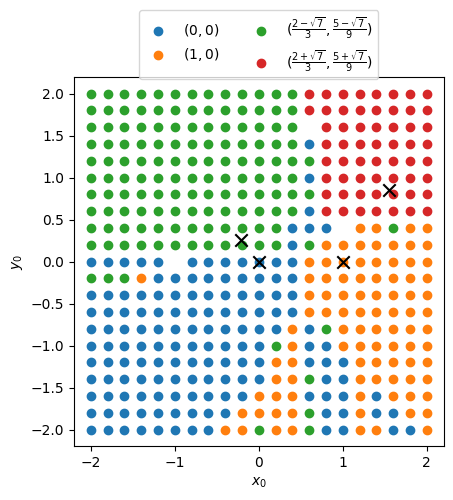

In [28]:
ym, xm = np.meshgrid(y_list, x_list)
plt.scatter(xm[roots==0].ravel(), ym[roots==0].ravel(), label=r'$(0,0)$')
# add the rest of the roots
plt.scatter(xm[roots==1].ravel(), ym[roots==1].ravel(), label=r'$(1,0)$')
plt.scatter(xm[roots==2].ravel(), ym[roots==2].ravel(), label=r'$(\frac{2-\sqrt{7}}{3}, \frac{5-\sqrt{7}}{9})$')
plt.scatter(xm[roots==3].ravel(), ym[roots==3].ravel(), label=r'$(\frac{2+\sqrt{7}}{3}, \frac{5+\sqrt{7}}{9})$')

plt.scatter([0], [0], marker='x', color='k', s=80)
# add the rest of the roots
plt.scatter([1], [0], marker='x', color='k', s=80)
plt.scatter([(2-np.sqrt(7))/3], [(5-np.sqrt(7))/9], marker='x', color='k', s=80)
plt.scatter([(2+np.sqrt(7))/3], [(5+np.sqrt(7))/9], marker='x', color='k', s=80)

plt.gca().set_aspect(1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.2), ncols=2)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$y_0$')